<a href="https://colab.research.google.com/github/mjkleiman/streamlineAD/blob/master/KleimanPhD_Chp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')
dir='/content/gdrive/My Drive/Dissertation/'


In [0]:
import dill

# Cost-Sum Feature Selection

In [0]:
adni_pair_X = pd.read_csv(f'{dir}/Data/adni_pair_X.csv')
adni_pair_y2 = pd.read_csv(f'{dir}/Data/adni_pair_y2.csv')
adni_pair_y3 = pd.read_csv(f'{dir}/Data/adni_pair_y3.csv')

features = pd.read_csv(f'{dir}/features_paired.csv')

## Efficiency Costs

### Time

Must be considered on its own. Any required delay is counted

- 1 = Less than a minute
- 2 = 1 min to 5 minutes
- 3 = 5 minutes to 20 minutes
- 4 = 20 minutes to 45 mins
- 5 = over 45 mins

In [0]:
df = pd.DataFrame(columns=adni_pair_X.columns.values)

In [0]:
df.loc['time',['moca_visuo_exec', 'moca_clock']]=2
df.loc['time',['moca_naming']]=1
df.loc['time',['moca_digits']]=2
df.loc['time',['moca_letters']]=2
df.loc['time',['moca_serial7']]=2
df.loc['time',['moca_repeat']]=1
df.loc['time',['moca_fluency']]=2
df.loc['time',['moca_recall']]=1
df.loc['time',['moca_similarities', 'moca_orient']]=1
df.loc['time',['faq1', 'faq2', 'faq3', 'faq4',
       'faq5', 'faq6', 'faq7', 'faq8', 'faq9', 'faq10']]=1
df.loc['time',['MMNAME']]=1
df.loc['time',['MMREPEAT']]=1
df.loc['time',['MMREAD']]=2
df.loc['time',['hach1', 'hach2', 'hach3', 'hach4', 'hach5', 'hach6', 'hach7',
       'hach8']]=1
df.loc['time',['PXHEADEY', 'PXNECK', 'PXHEART']]=2
df.loc['time',['vlt_recogn']]=2
df.loc['time',['vlt_delay']]=4
df.loc['time',['nbspan_forward', 'nbspan_backward']]=3
df.loc['time',['verbal_fluency']]=2
df.loc['time',['tma_time', 'tmb_time','tmb_mistakes']]=2
df.loc['time',['vlt_recall']]=2
df.loc['time',['npi1_sev', 'npi2_sev', 'npi3_sev', 'npi4_sev',
       'npi5_sev', 'npi6_sev', 'npi7_sev', 'npi8_sev', 'npi9_sev',
       'npi10_sev', 'npi11_sev', 'npi12_sev']]=1
df.loc['time',['PTGENDER', 'PTHAND',
       'PTEDUCAT', 'PTRETIRED', 'PTHOME', 'PTRACE']]=1
df.loc['time',['FAMHISTAD', 'FAMHISTDEM']]=1
df.loc['time',['q_memory_pt', 'q_orient_pt',
       'q_judgmt_pt', 'q_outsideact_pt', 'q_homeact_pt', 'q_language_pt',
       'q_attention_pt', 'q_memory_cg', 'q_orient_cg',
       'q_judgmt_cg', 'q_outsideact_cg', 'q_homeact_cg', 'q_language_cg',
       'q_attention_cg']]=1

### Difficulty

- 1 = Minimal/neglible effort/doctor not required
- 2 = Some effort required to analyze/administer (30 seconds or less to analyze), minimal focus
- 3 = Up to a few minutes required to analyze / requires focus or effort (cannot analyze with patient present) (minimum for needing specialist)
- 4 = Up to 5 minutes to analyze per question / requires significant focus or effort
- 5 = More than 5 minutes to analyze, extreme focus/effort required

In [0]:
df.loc['diff',['moca_visuo_exec', 'moca_clock']]=2
df.loc['diff',['moca_naming']]=2
df.loc['diff',['moca_digits']]=3
df.loc['diff',['moca_letters']]=3
df.loc['diff',['moca_serial7']]=3
df.loc['diff',['moca_repeat']]=2
df.loc['diff',['moca_fluency']]=3
df.loc['diff',['moca_recall']]=2
df.loc['diff',['moca_similarities', 'moca_orient']]=1
df.loc['diff',['faq1', 'faq2', 'faq3', 'faq4',
       'faq5', 'faq6', 'faq7', 'faq8', 'faq9', 'faq10']]=2
df.loc['diff',['MMNAME']]=1
df.loc['diff',['MMREPEAT']]=1
df.loc['diff',['MMREAD']]=2
df.loc['diff',['hach1', 'hach2', 'hach3', 'hach4', 'hach5', 'hach6', 'hach7',
       'hach8']]=2
df.loc['diff',['PXHEADEY', 'PXNECK', 'PXHEART']]=3
df.loc['diff',['vlt_recogn']]=2
df.loc['diff',['vlt_delay']]=2
df.loc['diff',['nbspan_forward', 'nbspan_backward']]=2
df.loc['diff',['verbal_fluency']]=1
df.loc['diff',['tma_time', 'tmb_time','tmb_mistakes']]=3
df.loc['diff',['vlt_recall']]=2
df.loc['diff',['npi1_sev', 'npi2_sev', 'npi3_sev', 'npi4_sev',
       'npi5_sev', 'npi6_sev', 'npi7_sev', 'npi8_sev', 'npi9_sev',
       'npi10_sev', 'npi11_sev', 'npi12_sev']]=3
df.loc['diff',['PTGENDER', 'PTHAND',
       'PTEDUCAT', 'PTRETIRED', 'PTHOME', 'PTRACE']]=1
df.loc['diff',['FAMHISTAD', 'FAMHISTDEM']]=1
df.loc['diff',['q_memory_pt', 'q_orient_pt',
       'q_judgmt_pt', 'q_outsideact_pt', 'q_homeact_pt', 'q_language_pt',
       'q_attention_pt', 'q_memory_cg', 'q_orient_cg',
       'q_judgmt_cg', 'q_outsideact_cg', 'q_homeact_cg', 'q_language_cg',
       'q_attention_cg']]=1

### Parsing

In [0]:
df = df.transpose()
df.dropna(inplace=True)

df['cost'] = df['time']+df['diff']
df['cost_reverse'] = df['cost']/10

'''Need to reverse sort cost, so that we can maximize both avg_score and
efficiency, instead of needing to maximize one and minimize the other'''
features['cost_reverse'] = 1 - features['cost_reverse']

df.sort_values('cost_reverse', ascending=False, inplace=True)
df = df.reset_index().rename({'index':'feature'}, axis=1)

df.to_csv(f'{dir}/features_costs_pair.csv', index=False)

## Feature importances

In [0]:
# features = pd.read_csv(f'{dir}/features_costs_pair.csv')
features = df
features.set_index('feature', inplace=True)
features = features.loc[adni_pair_X.columns.values]
features.reset_index(inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

from mlxtend.feature_selection import ExhaustiveFeatureSelector

efs = ExhaustiveFeatureSelector(clf, 
                                min_features=1, 
                                max_features=1, 
                                print_progress=True,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1)
efs = efs.fit(adni_pair_X, adni_pair_y2.values.ravel())

Features: 83/83

In [0]:
f_imp = pd.DataFrame.from_dict(efs.subsets_)
f_imp = f_imp.transpose()
f_imp['feature']=adni_pair_X.columns.values
f_imp = f_imp.sort_values('avg_score', ascending=False)
f_imp.drop(labels=['cv_scores','feature_idx','feature_names'], axis=1, inplace=True)

features = f_imp.merge(features, on='feature', how='left')

In [0]:


features.to_csv(f'{dir}/features_paired.csv', index=False)

## Select features

In [0]:
def cost_sum(feature_row, weight, start):
  feature_row_index = feature_row - 1
  print(feature_row, ' features.')
  print('Accuracy: ', f_costs.iloc[feature_row_index,0])
  print('Features: ', f_costs.iloc[feature_row_index,3])
  ilocs = list([int(s) for s in f_costs.iloc[feature_row_index,2].split(',')])
  print('Cost Sum: ', features.iloc[ilocs,4].sum(), ' Avg: ', features.iloc[ilocs,4].sum() / feature_row)
  print('Cost Time: ', features.iloc[ilocs,2].sum(), ' Avg: ', features.iloc[ilocs,2].sum() / feature_row)
  print('Cost Diff: ', features.iloc[ilocs,3].sum(), ' Avg: ', features.iloc[ilocs,3].sum() / feature_row)
  df = pd.DataFrame({'weighted':weight,'start_#':start,'f_#':feature_row,
                     'features':str(f_costs.iloc[feature_row_index,3]),
                     'accuracy':f_costs.iloc[feature_row_index,0],
                     'cost_sum':[features.iloc[ilocs,4].sum()]})
  
  return df

### Even weights

#### 50 starting features

In [0]:
# features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight'] = (features['avg_score'] + (features['cost_reverse']))/2
features.sort_values('weight', ascending=False, inplace=True)
features = features.head(50)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_even50.csv', index=False)



In [0]:
dill.dump_session(f'{dir}/Sessions/costs_even50.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814049,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 10","(q_memory_cg, moca_orient)"
3,0.819549,"[0.8812785388127854, 0.7488584474885844, 0.849...","0, 10, 12","(q_memory_cg, moca_orient, q_outsideact_pt)"
4,0.824132,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 10, 12","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
5,0.829624,"[0.8858447488584474, 0.7579908675799086, 0.867...","0, 3, 10, 12, 29","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
6,0.831455,"[0.8858447488584474, 0.7625570776255708, 0.867...","0, 3, 10, 12, 29, 42","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
7,0.831455,"[0.8858447488584474, 0.7625570776255708, 0.867...","0, 3, 10, 12, 14, 29, 42","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
8,0.832381,"[0.8812785388127854, 0.7625570776255708, 0.867...","0, 3, 10, 12, 14, 29, 30, 42","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
9,0.832381,"[0.8812785388127854, 0.7625570776255708, 0.867...","0, 3, 10, 12, 14, 29, 30, 42, 43","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
10,0.830554,"[0.8721461187214612, 0.7625570776255708, 0.867...","0, 3, 10, 12, 14, 29, 30, 38, 42, 43","(q_memory_cg, q_language_cg, moca_orient, q_ou..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_even50.db')

In [0]:
df = cost_sum(4, 'even', 50)

4  features.
Accuracy:  0.8241321874661558
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt')
Cost Sum:  4.0  Avg:  1.0
Cost Time:  4  Avg:  1.0
Cost Diff:  4  Avg:  1.0


In [0]:
df = df.append(cost_sum(5,'even', 50))

5  features.
Accuracy:  0.8296242456815213
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt', 'faq3')
Cost Sum:  5.5  Avg:  1.1
Cost Time:  5  Avg:  1.0
Cost Diff:  6  Avg:  1.2


In [0]:
df = df.append(cost_sum(12,'even', 50))

12  features.
Accuracy:  0.8278145570073555
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt', 'MMNAME', 'faq3', 'faq4', 'hach7', 'hach3', 'hach1', 'hach2', 'hach4')
Cost Sum:  15.5  Avg:  1.2916666666666667
Cost Time:  12  Avg:  1.0
Cost Diff:  19  Avg:  1.5833333333333333


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 30 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight'] = (features['avg_score'] + (features['cost_reverse']))/2
features.sort_values('weight', ascending=False, inplace=True)
features = features.head(30)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_even30.csv', index=False)



In [0]:
dill.dump_session(f'{dir}/Sessions/costs_even30.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814966,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 13","(q_memory_cg, moca_orient)"
3,0.819549,"[0.8812785388127854, 0.7488584474885844, 0.849...","0, 11, 13","(q_memory_cg, q_outsideact_pt, moca_orient)"
4,0.824132,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 11, 13","(q_memory_cg, q_language_cg, q_outsideact_pt, ..."
5,0.825963,"[0.8767123287671232, 0.7625570776255708, 0.858...","0, 3, 11, 13, 28","(q_memory_cg, q_language_cg, q_outsideact_pt, ..."
6,0.825963,"[0.8767123287671232, 0.7625570776255708, 0.858...","0, 3, 9, 11, 13, 28","(q_memory_cg, q_language_cg, MMNAME, q_outside..."
7,0.825963,"[0.8767123287671232, 0.7625570776255708, 0.858...","0, 3, 9, 11, 13, 17, 28","(q_memory_cg, q_language_cg, MMNAME, q_outside..."
8,0.82231,"[0.863013698630137, 0.7625570776255708, 0.8538...","0, 3, 7, 9, 11, 13, 17, 28","(q_memory_cg, q_language_cg, q_orient_cg, MMNA..."
9,0.821409,"[0.8493150684931506, 0.7442922374429224, 0.863...","0, 2, 3, 7, 9, 11, 13, 17, 28","(q_memory_cg, q_memory_pt, q_language_cg, q_or..."
10,0.816826,"[0.8447488584474886, 0.7488584474885844, 0.858...","0, 2, 3, 7, 9, 11, 13, 17, 24, 28","(q_memory_cg, q_memory_pt, q_language_cg, q_or..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_even30.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(5,'even', 30))

5  features.
Accuracy:  0.8259628606679488
Features:  ('q_memory_cg', 'q_language_cg', 'q_outsideact_pt', 'moca_orient', 'faq8')
Cost Sum:  5.5  Avg:  1.1
Cost Time:  5  Avg:  1.0
Cost Diff:  6  Avg:  1.2


In [0]:
df = df.append(cost_sum(6,'even', 30))

6  features.
Accuracy:  0.8259628606679488
Features:  ('q_memory_cg', 'q_language_cg', 'MMNAME', 'q_outsideact_pt', 'moca_orient', 'faq8')
Cost Sum:  6.5  Avg:  1.0833333333333333
Cost Time:  6  Avg:  1.0
Cost Diff:  7  Avg:  1.1666666666666667


In [0]:
df = df.append(cost_sum(7,'even', 30))

7  features.
Accuracy:  0.8259628606679488
Features:  ('q_memory_cg', 'q_language_cg', 'MMNAME', 'q_outsideact_pt', 'moca_orient', 'PTHAND', 'faq8')
Cost Sum:  7.5  Avg:  1.0714285714285714
Cost Time:  7  Avg:  1.0
Cost Diff:  8  Avg:  1.1428571428571428


In [0]:
df = df.append(cost_sum(8,'even', 30))

8  features.
Accuracy:  0.8223098926314194
Features:  ('q_memory_cg', 'q_language_cg', 'q_orient_cg', 'MMNAME', 'q_outsideact_pt', 'moca_orient', 'PTHAND', 'faq8')
Cost Sum:  8.5  Avg:  1.0625
Cost Time:  8  Avg:  1.0
Cost Diff:  9  Avg:  1.125


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 15 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight'] = (features['avg_score'] + (features['cost_reverse']))/2
features.sort_values('weight', ascending=False, inplace=True)
features = features.head(15)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(15), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_even15.csv', index=False)



In [0]:
dill.dump_session(f'{dir}/Sessions/costs_even15.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814966,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 10","(q_memory_cg, moca_orient)"
3,0.819549,"[0.8767123287671232, 0.7534246575342466, 0.853...","0, 3, 10","(q_memory_cg, q_language_cg, moca_orient)"
4,0.823215,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 10, 12","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
5,0.824132,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 7, 10, 12","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
6,0.821388,"[0.867579908675799, 0.7579908675799086, 0.8584...","0, 3, 7, 10, 12, 14","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
7,0.819562,"[0.867579908675799, 0.7534246575342466, 0.8493...","0, 2, 3, 7, 10, 12, 14","(q_memory_cg, q_memory_pt, q_language_cg, PTHA..."
8,0.825066,"[0.863013698630137, 0.7397260273972602, 0.8675...","0, 2, 3, 7, 10, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, PTHA..."
9,0.81867,"[0.8447488584474886, 0.7442922374429224, 0.863...","0, 2, 3, 7, 10, 11, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, PTHA..."
10,0.819591,"[0.8584474885844748, 0.7442922374429224, 0.849...","0, 2, 3, 5, 7, 10, 11, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, moca..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_even15.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(5,'even', 15))

5  features.
Accuracy:  0.8241321874661558
Features:  ('q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt')
Cost Sum:  5.0  Avg:  1.0
Cost Time:  5  Avg:  1.0
Cost Diff:  5  Avg:  1.0


In [0]:
df = df.append(cost_sum(8,'even', 15))

8  features.
Accuracy:  0.8250663367829425
Features:  ('q_memory_cg', 'q_memory_pt', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME')
Cost Sum:  8.0  Avg:  1.0
Cost Time:  8  Avg:  1.0
Cost Diff:  8  Avg:  1.0


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

### Importance over cost

#### 50 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x.5'] = (features['avg_score'] + (features['cost_reverse']*.5))/2
features.sort_values('weight_x.5', ascending=False)
features = features.head(50)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_importweight_50.csv', index=False)


In [0]:
dill.dump_session(f'{dir}/Sessions/costs_importweight50.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.809432,"[0.8767123287671232, 0.7534246575342466, 0.840...","0, 3","(q_memory_cg, q_memory_pt)"
3,0.809432,"[0.8767123287671232, 0.7534246575342466, 0.840...","0, 3, 15","(q_memory_cg, q_memory_pt, npi1_sev)"
4,0.809432,"[0.8767123287671232, 0.7534246575342466, 0.840...","0, 3, 15, 17","(q_memory_cg, q_memory_pt, npi1_sev, npi2_sev)"
5,0.807605,"[0.867579908675799, 0.7534246575342466, 0.8401...","0, 3, 15, 17, 21","(q_memory_cg, q_memory_pt, npi1_sev, npi2_sev,..."
6,0.807605,"[0.867579908675799, 0.7534246575342466, 0.8401...","0, 3, 15, 17, 21, 36","(q_memory_cg, q_memory_pt, npi1_sev, npi2_sev,..."
7,0.807605,"[0.867579908675799, 0.7534246575342466, 0.8401...","0, 3, 15, 17, 21, 36, 45","(q_memory_cg, q_memory_pt, npi1_sev, npi2_sev,..."
8,0.810379,"[0.863013698630137, 0.7442922374429224, 0.8538...","0, 1, 3, 15, 17, 21, 36, 45","(q_memory_cg, q_attention_cg, q_memory_pt, npi..."
9,0.814937,"[0.8721461187214612, 0.7671232876712328, 0.844...","0, 1, 3, 15, 17, 21, 28, 36, 45","(q_memory_cg, q_attention_cg, q_memory_pt, npi..."
10,0.818594,"[0.8721461187214612, 0.7808219178082192, 0.849...","0, 1, 3, 15, 17, 21, 28, 36, 44, 45","(q_memory_cg, q_attention_cg, q_memory_pt, npi..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_importweight50.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(7,'import', 50))

7  features.
Accuracy:  0.8076054723478172
Features:  ('q_memory_cg', 'q_memory_pt', 'npi1_sev', 'npi2_sev', 'hach8', 'hach1', 'MMREAD')
Cost Sum:  11.0  Avg:  1.5714285714285714
Cost Time:  8  Avg:  1.1428571428571428
Cost Diff:  14  Avg:  2.0


In [0]:
df = df.append(cost_sum(10,'import', 50))

10  features.
Accuracy:  0.818593855182049
Features:  ('q_memory_cg', 'q_attention_cg', 'q_memory_pt', 'npi1_sev', 'npi2_sev', 'hach8', 'FAMHISTAD', 'hach1', 'moca_letters', 'MMREAD')
Cost Sum:  15.5  Avg:  1.55
Cost Time:  12  Avg:  1.2
Cost Diff:  19  Avg:  1.9


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 30 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x.5'] = (features['avg_score'] + (features['cost_reverse']*.5))/2
features.sort_values('weight_x.5', ascending=False)
features = features.head(30)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_importweight_30.csv', index=False)


In [0]:
dill.dump_session(f'{dir}/Sessions/costs_importweight30.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.80673,"[0.867579908675799, 0.7351598173515982, 0.8401...","0, 22","(q_memory_cg, npi3_sev)"
3,0.808561,"[0.867579908675799, 0.7397260273972602, 0.8401...","0, 22, 27","(q_memory_cg, npi3_sev, hach2)"
4,0.810387,"[0.8584474885844748, 0.7488584474885844, 0.849...","0, 6, 22, 27","(q_memory_cg, q_language_cg, npi3_sev, hach2)"
5,0.809461,"[0.8584474885844748, 0.7488584474885844, 0.849...","0, 6, 14, 22, 27","(q_memory_cg, q_language_cg, q_orient_pt, npi3..."
6,0.814949,"[0.8584474885844748, 0.7579908675799086, 0.858...","0, 6, 14, 15, 22, 27","(q_memory_cg, q_language_cg, q_orient_pt, npi1..."
7,0.81404,"[0.8538812785388128, 0.7534246575342466, 0.858...","0, 6, 14, 15, 19, 22, 27","(q_memory_cg, q_language_cg, q_orient_pt, npi1..."
8,0.813123,"[0.8538812785388128, 0.7534246575342466, 0.858...","0, 6, 14, 15, 17, 19, 22, 27","(q_memory_cg, q_language_cg, q_orient_pt, npi1..."
9,0.808557,"[0.8493150684931506, 0.7534246575342466, 0.840...","0, 6, 14, 15, 17, 19, 21, 22, 27","(q_memory_cg, q_language_cg, q_orient_pt, npi1..."
10,0.807635,"[0.8493150684931506, 0.7534246575342466, 0.840...","0, 6, 13, 14, 15, 17, 19, 21, 22, 27","(q_memory_cg, q_language_cg, npi6_sev, q_orien..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_importweight30.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(4,'import', 30))

4  features.
Accuracy:  0.8103873218704145
Features:  ('q_memory_cg', 'q_language_cg', 'npi3_sev', 'hach2')
Cost Sum:  5.5  Avg:  1.375
Cost Time:  4  Avg:  1.0
Cost Diff:  7  Avg:  1.75


In [0]:
df = df.append(cost_sum(6,'import', 30))

6  features.
Accuracy:  0.8149492655125755
Features:  ('q_memory_cg', 'q_language_cg', 'q_orient_pt', 'npi1_sev', 'npi3_sev', 'hach2')
Cost Sum:  8.5  Avg:  1.4166666666666667
Cost Time:  6  Avg:  1.0
Cost Diff:  11  Avg:  1.8333333333333333


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 15 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x.5'] = (features['avg_score'] + (features['cost_reverse']*.5))/2
features.sort_values('weight_x.5', ascending=False)
features = features.head(15)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(15), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_importweight_15.csv', index=False)



In [0]:
dill.dump_session(f'{dir}/Sessions/costs_importweight15.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.810366,"[0.867579908675799, 0.7488584474885844, 0.8447...","0, 14","(q_memory_cg, q_orient_pt)"
3,0.814949,"[0.8584474885844748, 0.7579908675799086, 0.858...","0, 6, 14","(q_memory_cg, q_language_cg, q_orient_pt)"
4,0.814941,"[0.8584474885844748, 0.7625570776255708, 0.858...","0, 6, 13, 14","(q_memory_cg, q_language_cg, npi6_sev, q_orien..."
5,0.811284,"[0.8538812785388128, 0.7534246575342466, 0.858...","0, 6, 11, 13, 14","(q_memory_cg, q_language_cg, npi8_sev, npi6_se..."
6,0.811275,"[0.8538812785388128, 0.7671232876712328, 0.853...","0, 6, 11, 12, 13, 14","(q_memory_cg, q_language_cg, npi8_sev, npi7_se..."
7,0.810354,"[0.8447488584474886, 0.7625570776255708, 0.863...","0, 6, 10, 11, 12, 13, 14","(q_memory_cg, q_language_cg, npi9_sev, npi8_se..."
8,0.806688,"[0.8584474885844748, 0.7442922374429224, 0.867...","0, 5, 6, 10, 11, 12, 13, 14","(q_memory_cg, moca_recall, q_language_cg, npi9..."
9,0.809449,"[0.8493150684931506, 0.7625570776255708, 0.853...","0, 5, 6, 9, 10, 11, 12, 13, 14","(q_memory_cg, moca_recall, q_language_cg, npi5..."
10,0.802147,"[0.8401826484018264, 0.7351598173515982, 0.858...","0, 3, 5, 6, 9, 10, 11, 12, 13, 14","(q_memory_cg, q_memory_pt, moca_recall, q_lang..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_importweight15.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(3,'import', 15))

3  features.
Accuracy:  0.8149492655125755
Features:  ('q_memory_cg', 'q_language_cg', 'q_orient_pt')
Cost Sum:  3.0  Avg:  1.0
Cost Time:  3  Avg:  1.0
Cost Diff:  3  Avg:  1.0


In [0]:
df = df.append(cost_sum(4,'import', 15))

4  features.
Accuracy:  0.8149408485355327
Features:  ('q_memory_cg', 'q_language_cg', 'npi6_sev', 'q_orient_pt')
Cost Sum:  5.0  Avg:  1.25
Cost Time:  4  Avg:  1.0
Cost Diff:  6  Avg:  1.5


In [0]:
df = df.append(cost_sum(6,'import', 15))

6  features.
Accuracy:  0.8112753129484187
Features:  ('q_memory_cg', 'q_language_cg', 'npi8_sev', 'npi7_sev', 'npi6_sev', 'q_orient_pt')
Cost Sum:  9.0  Avg:  1.5
Cost Time:  6  Avg:  1.0
Cost Diff:  12  Avg:  2.0


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

### Cost over importance

#### 50 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x2'] = (features['avg_score'] + (features['cost_reverse']*2))/2
features.sort_values('weight_x2', ascending=False, inplace=True)
features = features.head(50)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_costweight_50.csv', index=False)



In [0]:
dill.dump_session(f'{dir}/Sessions/costs_costweight50.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814966,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 10","(q_memory_cg, moca_orient)"
3,0.820467,"[0.8767123287671232, 0.7534246575342466, 0.853...","0, 10, 47","(q_memory_cg, moca_orient, faq2)"
4,0.823215,"[0.8767123287671232, 0.7534246575342466, 0.863...","0, 3, 10, 47","(q_memory_cg, q_language_cg, moca_orient, faq2)"
5,0.825954,"[0.8767123287671232, 0.7671232876712328, 0.863...","0, 3, 10, 42, 47","(q_memory_cg, q_language_cg, moca_orient, hach..."
6,0.826872,"[0.8767123287671232, 0.7671232876712328, 0.863...","0, 3, 10, 41, 42, 47","(q_memory_cg, q_language_cg, moca_orient, hach..."
7,0.826872,"[0.8767123287671232, 0.7671232876712328, 0.863...","0, 3, 10, 14, 41, 42, 47","(q_memory_cg, q_language_cg, moca_orient, MMNA..."
8,0.825967,"[0.8767123287671232, 0.7579908675799086, 0.863...","0, 3, 6, 10, 14, 41, 42, 47","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
9,0.825054,"[0.8721461187214612, 0.7579908675799086, 0.863...","0, 3, 6, 10, 14, 31, 41, 42, 47","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
10,0.824132,"[0.8721461187214612, 0.7579908675799086, 0.863...","0, 3, 6, 10, 14, 31, 41, 42, 43, 47","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_costweight50.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(3,'cost', 50))

3  features.
Accuracy:  0.8204666132690553
Features:  ('q_memory_cg', 'moca_orient', 'faq2')
Cost Sum:  3.5  Avg:  1.1666666666666667
Cost Time:  3  Avg:  1.0
Cost Diff:  4  Avg:  1.3333333333333333


In [0]:
df = df.append(cost_sum(4,'cost', 50))

4  features.
Accuracy:  0.8232147562734953
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'faq2')
Cost Sum:  4.5  Avg:  1.125
Cost Time:  4  Avg:  1.0
Cost Diff:  5  Avg:  1.25


In [0]:
df = df.append(cost_sum(5,'cost', 50))

5  features.
Accuracy:  0.8259544823008926
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'hach2', 'faq2')
Cost Sum:  6.0  Avg:  1.2
Cost Time:  5  Avg:  1.0
Cost Diff:  7  Avg:  1.4


In [0]:
df = df.append(cost_sum(6,'cost', 50))

6  features.
Accuracy:  0.826871913493553
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'hach1', 'hach2', 'faq2')
Cost Sum:  7.5  Avg:  1.25
Cost Time:  6  Avg:  1.0
Cost Diff:  9  Avg:  1.5


In [0]:
df = df.append(cost_sum(7,'cost', 50))

7  features.
Accuracy:  0.826871913493553
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'MMNAME', 'hach1', 'hach2', 'faq2')
Cost Sum:  8.5  Avg:  1.2142857142857142
Cost Time:  7  Avg:  1.0
Cost Diff:  10  Avg:  1.4285714285714286


In [0]:
df = df.append(cost_sum(8,'cost', 50))

8  features.
Accuracy:  0.8259670884614636
Features:  ('q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'MMNAME', 'hach1', 'hach2', 'faq2')
Cost Sum:  9.5  Avg:  1.1875
Cost Time:  8  Avg:  1.0
Cost Diff:  11  Avg:  1.375


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 30 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x2'] = (features['avg_score'] + (features['cost_reverse']*2))/2
features.sort_values('weight_x2', ascending=False, inplace=True)
features = features.head(30)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_costweight_30.csv', index=False)


In [0]:
dill.dump_session(f'{dir}/Sessions/costs_costweight30.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814966,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 10","(q_memory_cg, moca_orient)"
3,0.819549,"[0.8767123287671232, 0.7534246575342466, 0.853...","0, 3, 10","(q_memory_cg, q_language_cg, moca_orient)"
4,0.824132,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 10, 12","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
5,0.829624,"[0.8858447488584474, 0.7579908675799086, 0.867...","0, 3, 10, 12, 29","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
6,0.829624,"[0.8858447488584474, 0.7579908675799086, 0.867...","0, 3, 10, 12, 14, 29","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
7,0.828711,"[0.8812785388127854, 0.7579908675799086, 0.867...","0, 3, 10, 12, 13, 14, 29","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
8,0.829658,"[0.863013698630137, 0.7351598173515982, 0.8858...","0, 2, 3, 10, 12, 13, 14, 29","(q_memory_cg, q_memory_pt, q_language_cg, moca..."
9,0.829645,"[0.863013698630137, 0.7579908675799086, 0.8767...","0, 2, 3, 4, 10, 12, 13, 14, 29","(q_memory_cg, q_memory_pt, q_language_cg, moca..."
10,0.828715,"[0.867579908675799, 0.7534246575342466, 0.8721...","0, 2, 3, 4, 9, 10, 12, 13, 14, 29","(q_memory_cg, q_memory_pt, q_language_cg, moca..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_costweight30.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(4,'cost', 30))

4  features.
Accuracy:  0.8241321874661558
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt')
Cost Sum:  4.0  Avg:  1.0
Cost Time:  4  Avg:  1.0
Cost Diff:  4  Avg:  1.0


In [0]:
df = df.append(cost_sum(5,'cost', 30))

5  features.
Accuracy:  0.8296242456815213
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt', 'faq3')
Cost Sum:  5.5  Avg:  1.1
Cost Time:  5  Avg:  1.0
Cost Diff:  6  Avg:  1.2


In [0]:
df = df.append(cost_sum(6,'cost', 30))

6  features.
Accuracy:  0.8296242456815213
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt', 'MMNAME', 'faq3')
Cost Sum:  6.5  Avg:  1.0833333333333333
Cost Time:  6  Avg:  1.0
Cost Diff:  7  Avg:  1.1666666666666667


In [0]:
df = df.append(cost_sum(7,'cost', 30))

7  features.
Accuracy:  0.8287110036723888
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME', 'faq3')
Cost Sum:  7.5  Avg:  1.0714285714285714
Cost Time:  7  Avg:  1.0
Cost Diff:  8  Avg:  1.1428571428571428


In [0]:
df = df.append(cost_sum(12,'cost', 30))

12  features.
Accuracy:  0.833281480121552
Features:  ('q_memory_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'q_attention_pt', 'moca_orient', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME', 'PTRACE', 'verbal_fluency', 'faq3')
Cost Sum:  13.0  Avg:  1.0833333333333333
Cost Time:  13  Avg:  1.0833333333333333
Cost Diff:  13  Avg:  1.0833333333333333


In [0]:
df = df.append(cost_sum(15,'cost', 30))

15  features.
Accuracy:  0.8451829119149838
Features:  ('q_memory_cg', 'q_attention_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'q_attention_pt', 'moca_orient', 'FAMHISTAD', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME', 'q_orient_pt', 'PTRACE', 'verbal_fluency', 'faq3')
Cost Sum:  16.0  Avg:  1.0666666666666667
Cost Time:  16  Avg:  1.0666666666666667
Cost Diff:  16  Avg:  1.0666666666666667


In [0]:
df = df.append(cost_sum(16,'cost', 30))

16  features.
Accuracy:  0.8460961539241163
Features:  ('q_memory_cg', 'q_attention_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'q_attention_pt', 'moca_orient', 'FAMHISTAD', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME', 'q_orient_pt', 'PTRACE', 'q_judgmt_cg', 'verbal_fluency', 'faq3')
Cost Sum:  17.0  Avg:  1.0625
Cost Time:  17  Avg:  1.0625
Cost Diff:  17  Avg:  1.0625


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

#### 15 starting features

In [0]:
features = pd.read_csv(f'{dir}/features_paired.csv')
features['weight_x2'] = (features['avg_score'] + (features['cost_reverse']*2))/2
features.sort_values('weight_x2', ascending=False, inplace=True)
features = features.head(15)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)

clf = RandomForestClassifier(n_estimators=100, max_features=.5)

adni_pair_i_X = adni_pair_X.loc[:,features['feature']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(clf, 
           k_features=(15), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)

sfs1 = sfs1.fit(adni_pair_i_X, adni_pair_y2.values.ravel())

In [0]:
f_costs = pd.DataFrame.from_dict(sfs1.subsets_)
f_costs = f_costs.transpose()
f_costs['feature_idx'] = f_costs['feature_idx'].apply(str).str.replace('(','').str.replace(')','')
f_costs.to_csv(f'{dir}/Output/eff_features_paired_costweight_15.csv', index=False)


In [0]:
dill.dump_session(f'{dir}/Sessions/costs_costweight15.db')

In [0]:
f_costs

,avg_score,cv_scores,feature_idx,feature_names
1,0.803048,"[0.8721461187214612, 0.730593607305936, 0.8401...","0,","(q_memory_cg,)"
2,0.814966,"[0.8812785388127854, 0.7442922374429224, 0.844...","0, 10","(q_memory_cg, moca_orient)"
3,0.820462,"[0.8812785388127854, 0.7534246575342466, 0.853...","0, 3, 10","(q_memory_cg, q_language_cg, moca_orient)"
4,0.823219,"[0.8767123287671232, 0.7579908675799086, 0.853...","0, 3, 10, 12","(q_memory_cg, q_language_cg, moca_orient, q_ou..."
5,0.824132,"[0.8767123287671232, 0.7579908675799086, 0.858...","0, 3, 6, 10, 12","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
6,0.822306,"[0.867579908675799, 0.7579908675799086, 0.8584...","0, 3, 6, 10, 12, 14","(q_memory_cg, q_language_cg, PTHAND, moca_orie..."
7,0.817723,"[0.8538812785388128, 0.7579908675799086, 0.858...","0, 2, 3, 6, 10, 12, 14","(q_memory_cg, q_memory_pt, q_language_cg, PTHA..."
8,0.82231,"[0.863013698630137, 0.7442922374429224, 0.8675...","0, 2, 3, 6, 10, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, PTHA..."
9,0.822314,"[0.8538812785388128, 0.7671232876712328, 0.853...","0, 2, 3, 4, 6, 10, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, moca..."
10,0.819574,"[0.863013698630137, 0.776255707762557, 0.82648...","0, 2, 3, 4, 6, 10, 11, 12, 13, 14","(q_memory_cg, q_memory_pt, q_language_cg, moca..."


#### Cost Sums

In [0]:
dill.load_session(f'{dir}/Sessions/costs_costweight15.db')
df = pd.read_csv(f'{dir}/Output/cost_sum.csv')

In [0]:
df = df.append(cost_sum(3,'cost', 15))

3  features.
Accuracy:  0.8204624240855273
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient')
Cost Sum:  3.0  Avg:  1.0
Cost Time:  3  Avg:  1.0
Cost Diff:  3  Avg:  1.0


In [0]:
df = df.append(cost_sum(4,'cost', 15))

4  features.
Accuracy:  0.8232189454570236
Features:  ('q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt')
Cost Sum:  4.0  Avg:  1.0
Cost Time:  4  Avg:  1.0
Cost Diff:  4  Avg:  1.0


In [0]:
df = df.append(cost_sum(5,'cost', 15))

5  features.
Accuracy:  0.8241321874661558
Features:  ('q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt')
Cost Sum:  5.0  Avg:  1.0
Cost Time:  5  Avg:  1.0
Cost Diff:  5  Avg:  1.0


In [0]:
df = df.append(cost_sum(6,'cost', 15))

6  features.
Accuracy:  0.8223057034478909
Features:  ('q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt', 'MMNAME')
Cost Sum:  6.0  Avg:  1.0
Cost Time:  6  Avg:  1.0
Cost Diff:  6  Avg:  1.0


In [0]:
df = df.append(cost_sum(11,'cost', 15))

11  features.
Accuracy:  0.8241575156172569
Features:  ('q_memory_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'PTHAND', 'PTRETIRED', 'moca_orient', 'FAMHISTAD', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME')
Cost Sum:  11.0  Avg:  1.0
Cost Time:  11  Avg:  1.0
Cost Diff:  11  Avg:  1.0


In [0]:
df.to_csv(f'{dir}/Output/cost_sum.csv', index=False)

# Feature Testing (ADNI/Clinic)

In [0]:
adni_pair_X = pd.read_csv(f'{dir}/Data/adni_pair_X.csv')
clinic_pair_X = pd.read_csv(f'{dir}/Data/sm_clinic_pair_X.csv')

adni_pair_y2 = pd.read_csv(f'{dir}/Data/adni_pair_y2.csv')
adni_pair_y3 = pd.read_csv(f'{dir}/Data/adni_pair_y3.csv')

clinic_pair_y2 = pd.read_csv(f'{dir}/Data/sm_clinic_pair_y2.csv', header=None)
clinic_pair_y3 = pd.read_csv(f'{dir}/Data/sm_clinic_pair_y3.csv', header=None)


from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neural_network import MLPClassifier

def costsum_traintest(feature_row_index, X_train, y_train, X_test, y_test, 
                      random_state=0):
  features = df_costsum.iloc[feature_row_index,3]
  X_train = X_train.loc[:,features]
  X_test = X_test.loc[:,features]
  
  rf = RandomForestClassifier(n_estimators=100, max_features=.5, 
                              random_state=random_state)
  rf.fit(X_train, y_train.values.ravel())
  y_pred = rf.predict(X_test)
  rf_testacc = accuracy_score(y_test, y_pred)
  rf_auc = roc_auc_score(y_test, y_pred)
  
  mlp = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='sgd', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=5000, random_state=random_state)
  mlp.fit(X_train, y_train.values.ravel())
  y_pred = mlp.predict(X_test)
  mlp_testacc = accuracy_score(y_test, y_pred)
  mlp_auc = roc_auc_score(y_test, y_pred)
  return rf_testacc, rf_auc, mlp_testacc, mlp_auc



In [0]:
for j in [0,10,20,30,40]:
  
  df_costsum = pd.read_csv(f'{dir}/Output/cost_sum.csv')
  df_costsum.sort_values(['cost_sum','accuracy'], ascending=[True, False], 
                         inplace=True)
  df_costsum.drop_duplicates(subset=['features'], inplace=True) # Remove duplicate
  df_costsum.reset_index(drop=True, inplace=True) # Fix index order
  df_costsum.features = df_costsum.features.str.replace(' ', '')\
                      .str.replace('\'','').str.replace('\(','')\
                      .str.replace('\)','').str.split(',')
  for i in df_costsum.index:
    df_costsum.loc[i,'rf_score'], df_costsum.loc[i,'rf_auc'], \
    df_costsum.loc[i,'mlp_score'], df_costsum.loc[i,'mlp_auc'] = \
    costsum_traintest(i, adni_pair_X, adni_pair_y2, clinic_pair_X, clinic_pair_y2,
                     random_state=j)
    
    df_costsum.to_csv(f'{dir}/Output/cost_sum_output_s_'+str(j)+'.csv', index=False)

In [0]:
# df_costsum.to_csv(f'{dir}/Output/cost_sum_output2_0.csv', index=False)

In [0]:
df_s_0 = pd.read_csv(f'{dir}/Output/cost_sum_output_s_0.csv')
df_s_10 = pd.read_csv(f'{dir}/Output/cost_sum_output_s_10.csv')
df_s_20 = pd.read_csv(f'{dir}/Output/cost_sum_output_s_20.csv')
df_s_30 = pd.read_csv(f'{dir}/Output/cost_sum_output_s_30.csv')
df_s_40 = pd.read_csv(f'{dir}/Output/cost_sum_output_s_40.csv')
df_us_0 = pd.read_csv(f'{dir}/Output/cost_sum_output_0.csv')
df_us_10 = pd.read_csv(f'{dir}/Output/cost_sum_output_10.csv')
df_us_20 = pd.read_csv(f'{dir}/Output/cost_sum_output_20.csv')
df_us_30 = pd.read_csv(f'{dir}/Output/cost_sum_output_30.csv')
df_us_40 = pd.read_csv(f'{dir}/Output/cost_sum_output_40.csv')

df = pd.concat([df_s_0, df_s_10, df_s_20, df_s_30, df_s_40, df_us_0, df_us_10,
               df_us_20, df_us_30, df_us_40], axis=0)

In [0]:
df_costsum['rf_score'] = df['rf_score'].groupby(df.index).mean()
df_costsum['rf_auc'] = df['rf_auc'].groupby(df.index).mean()
df_costsum['mlp_score'] = df['mlp_score'].groupby(df.index).mean()
df_costsum['mlp_auc'] = df['mlp_auc'].groupby(df.index).mean()

In [0]:
df_costsum = df_costsum[df_costsum['rf_score']>0.65]
df_costsum

,weighted,start_#,f_#,features,accuracy,cost_sum,rf_score,rf_auc,mlp_score,mlp_auc
0,cost,15,3,"[q_memory_cg, q_language_cg, moca_orient]",0.820462,3.0,0.839934,0.844708,0.745545,0.755557
1,import,15,3,"[q_memory_cg, q_language_cg, q_orient_pt]",0.814949,3.0,0.752475,0.764910,0.762706,0.763971
2,cost,50,3,"[q_memory_cg, moca_orient, faq2]",0.820467,3.5,0.765677,0.753517,0.701980,0.694539
3,even,50,4,"[q_memory_cg, q_language_cg, moca_orient, q_ou...",0.824132,4.0,0.845875,0.849764,0.769307,0.781142
4,cost,50,4,"[q_memory_cg, q_language_cg, moca_orient, faq2]",0.823215,4.5,0.781188,0.766719,0.722112,0.721083
5,even,15,5,"[q_memory_cg, q_language_cg, PTHAND, moca_orie...",0.824132,5.0,0.846205,0.850045,0.774587,0.782301
6,import,15,4,"[q_memory_cg, q_language_cg, npi6_sev, q_orien...",0.814941,5.0,0.752475,0.764910,0.759736,0.761443
7,even,50,5,"[q_memory_cg, q_language_cg, moca_orient, q_ou...",0.829624,5.5,0.797030,0.795447,0.753795,0.745191
8,even,30,5,"[q_memory_cg, q_language_cg, q_outsideact_pt, ...",0.825963,5.5,0.821452,0.820045,0.753135,0.754038
9,import,30,4,"[q_memory_cg, q_language_cg, npi3_sev, hach2]",0.810387,5.5,0.729373,0.721427,0.787789,0.789488


In [0]:
df_costsum.to_csv(f'{dir}/Output/cost_sum_output_avg.csv', index=False)

# In-depth analysis

In [0]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

df_costsum = pd.read_csv(f'{dir}/Output/cost_sum_output_avg.csv')
df_costsum.features = df_costsum.features.str.replace(' ', '')\
                      .str.replace('\'','').str.replace('\[','')\
                      .str.replace('\]','').str.split(',')

adni_X = pd.read_csv(f'{dir}/Data/adni_pair_unscaled_X.csv')
adni_y = pd.read_csv(f'{dir}/Data/adni_pair_us_y2.csv')
clinic_X = pd.read_csv(f'{dir}/Data/sm_clinic_pair_us_X.csv')
clinic_y = pd.read_csv(f'{dir}/Data/sm_clinic_pair_y2.csv', header=None)

In [0]:
!pip install scikit-plot
import scikitplot as skplt

## Row 0: q_memory_cg, q_language_cg, moca_orient

In [0]:
features = df_costsum.iloc[0,3]

X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=.5, 
                            min_samples_leaf=2, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8368314606741574


              precision    recall  f1-score   support

         0.0      0.734     0.904     0.810       125
         1.0      0.919     0.770     0.838       178

    accuracy                          0.825       303
   macro avg      0.827     0.837     0.824       303
weighted avg      0.843     0.825     0.826       303



[[113  12]
 [ 41 137]]


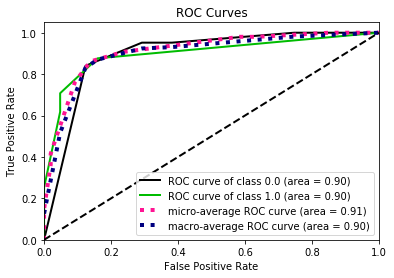

In [0]:

adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='sgd', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8044044943820223


              precision    recall  f1-score   support

         0.0      0.709     0.856     0.775       125
         1.0      0.882     0.753     0.812       178

    accuracy                          0.795       303
   macro avg      0.795     0.804     0.794       303
weighted avg      0.810     0.795     0.797       303



[[107  18]
 [ 44 134]]


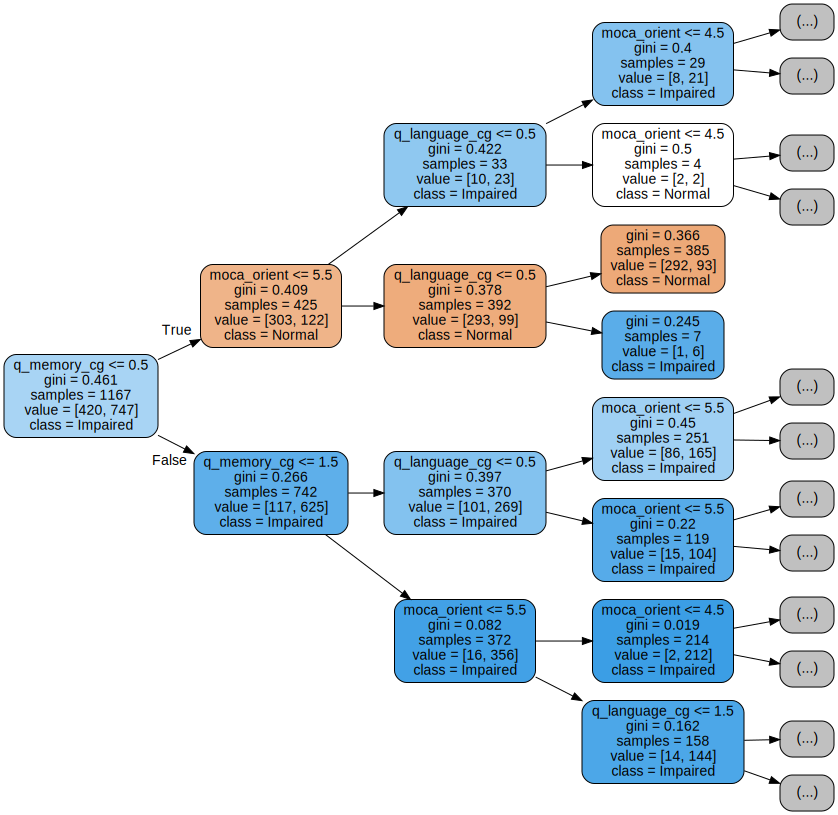

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row0_3.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 3: ['q_memory_cg', 'q_language_cg', 'moca_orient', 'q_outsideact_pt']

In [0]:
features = df_costsum.iloc[3,3]

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=.5, 
                            min_samples_leaf=5, bootstrap=True, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8424494382022473


              precision    recall  f1-score   support

         0.0      0.743     0.904     0.816       125
         1.0      0.921     0.781     0.845       178

    accuracy                          0.832       303
   macro avg      0.832     0.842     0.830       303
weighted avg      0.847     0.832     0.833       303



[[113  12]
 [ 39 139]]


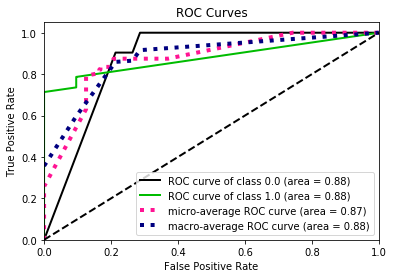

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='adam', alpha=.0001, learning_rate_init=.005, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8532584269662922


              precision    recall  f1-score   support

         0.0      0.752     0.920     0.827       125
         1.0      0.933     0.787     0.854       178

    accuracy                          0.842       303
   macro avg      0.842     0.853     0.840       303
weighted avg      0.858     0.842     0.843       303



[[115  10]
 [ 38 140]]


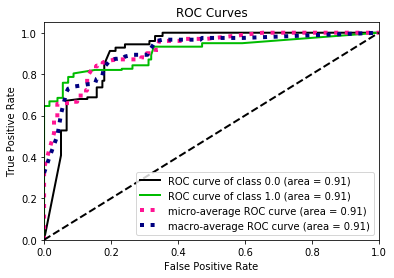

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
fig = roc.get_figure()
fig.savefig(f'{dir}/Figures/roc_eff_row3_4_mlp', dpi=300)

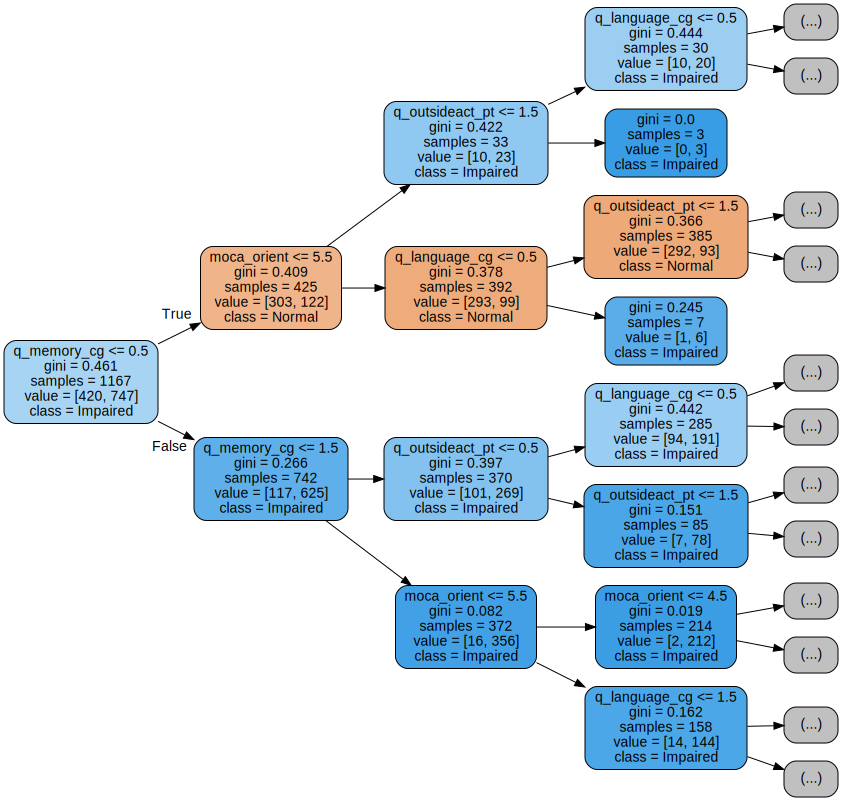

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row3_4.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row X: ['q_memory_cg', 'q_language_cg',  'moca_orient', 'q_memory_pt, q_judgement_pt', 'q_outsideact_pt']

In [0]:
features = ['q_memory_cg', 'q_language_cg', 'q_memory_pt', 'moca_orient', 'q_judgmt_pt','q_outsideact_pt']

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=500, max_features=.5, 
                            min_samples_leaf=1, bootstrap=True, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.7975056179775282


              precision    recall  f1-score   support

         0.0      0.673     0.904     0.771       125
         1.0      0.911     0.691     0.786       178

    accuracy                          0.779       303
   macro avg      0.792     0.798     0.779       303
weighted avg      0.813     0.779     0.780       303



[[113  12]
 [ 55 123]]


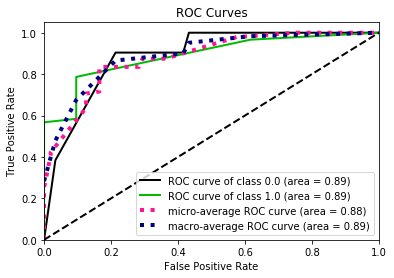

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='adam', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8464494382022472


              precision    recall  f1-score   support

         0.0      0.745     0.912     0.820       125
         1.0      0.927     0.781     0.848       178

    accuracy                          0.835       303
   macro avg      0.836     0.846     0.834       303
weighted avg      0.852     0.835     0.836       303



[[114  11]
 [ 39 139]]


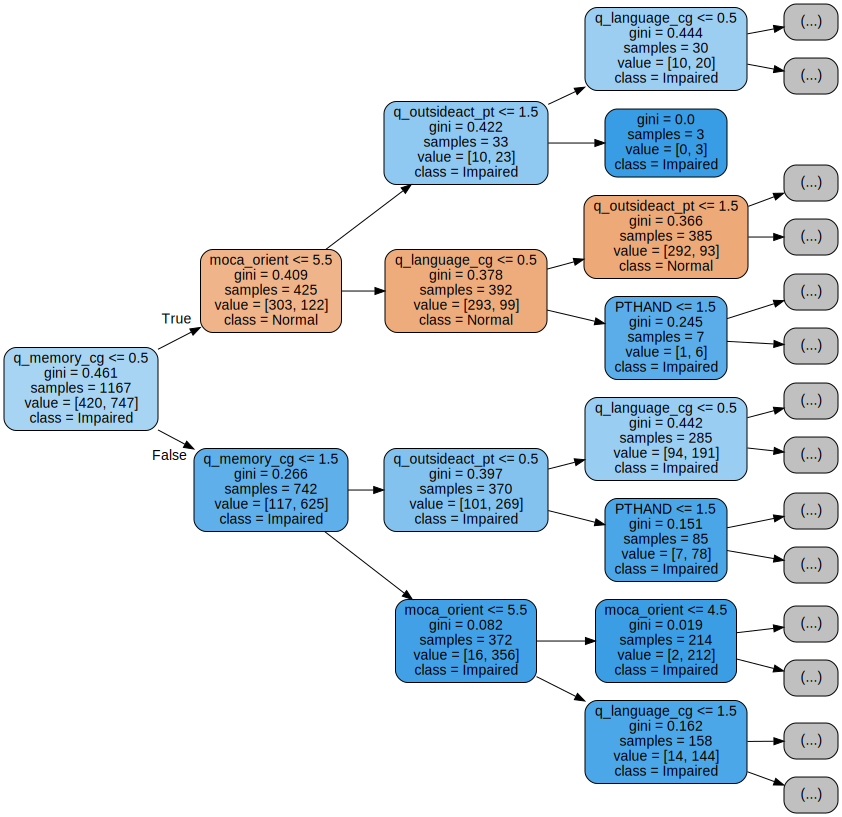

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row5_5.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 5: ['q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt']

In [0]:
features = df_costsum.iloc[5,3]

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=.5, 
                            min_samples_leaf=7, bootstrap=True, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8424494382022473


              precision    recall  f1-score   support

         0.0      0.743     0.904     0.816       125
         1.0      0.921     0.781     0.845       178

    accuracy                          0.832       303
   macro avg      0.832     0.842     0.830       303
weighted avg      0.847     0.832     0.833       303



[[113  12]
 [ 39 139]]


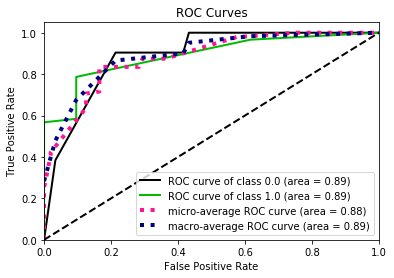

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='adam', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8021123595505618


              precision    recall  f1-score   support

         0.0      0.754     0.784     0.769       125
         1.0      0.844     0.820     0.832       178

    accuracy                          0.805       303
   macro avg      0.799     0.802     0.800       303
weighted avg      0.807     0.805     0.806       303



[[ 98  27]
 [ 32 146]]


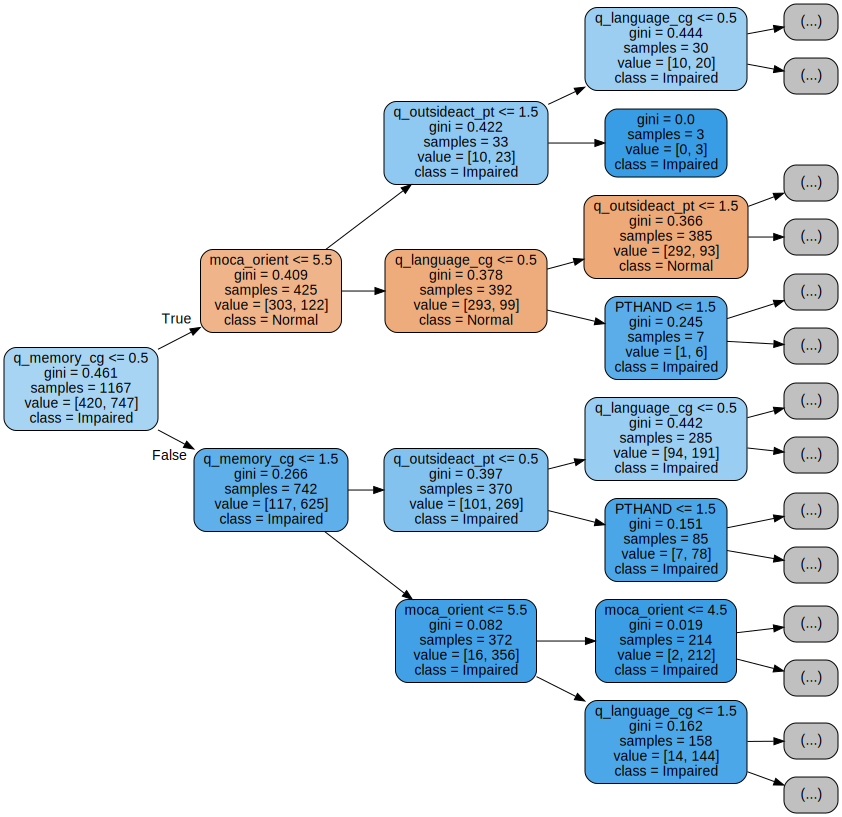

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row5_5.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 11: ['q_memory_cg', 'q_language_cg', 'PTHAND', 'moca_orient', 'q_outsideact_pt', 'MMNAME']

In [0]:
features = df_costsum.iloc[11,3]

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=.5, 
                            min_samples_leaf=3, bootstrap=True, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8424494382022473


              precision    recall  f1-score   support

         0.0      0.743     0.904     0.816       125
         1.0      0.921     0.781     0.845       178

    accuracy                          0.832       303
   macro avg      0.832     0.842     0.830       303
weighted avg      0.847     0.832     0.833       303



[[113  12]
 [ 39 139]]


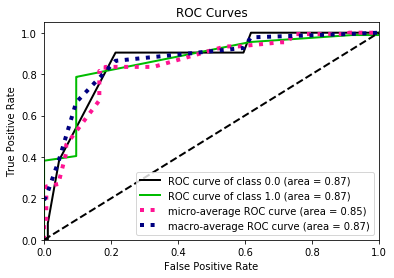

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,60,15), activation='relu', 
                      solver='sgd', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8175955056179776


              precision    recall  f1-score   support

         0.0      0.712     0.888     0.790       125
         1.0      0.905     0.747     0.818       178

    accuracy                          0.805       303
   macro avg      0.808     0.818     0.804       303
weighted avg      0.825     0.805     0.807       303



[[111  14]
 [ 45 133]]


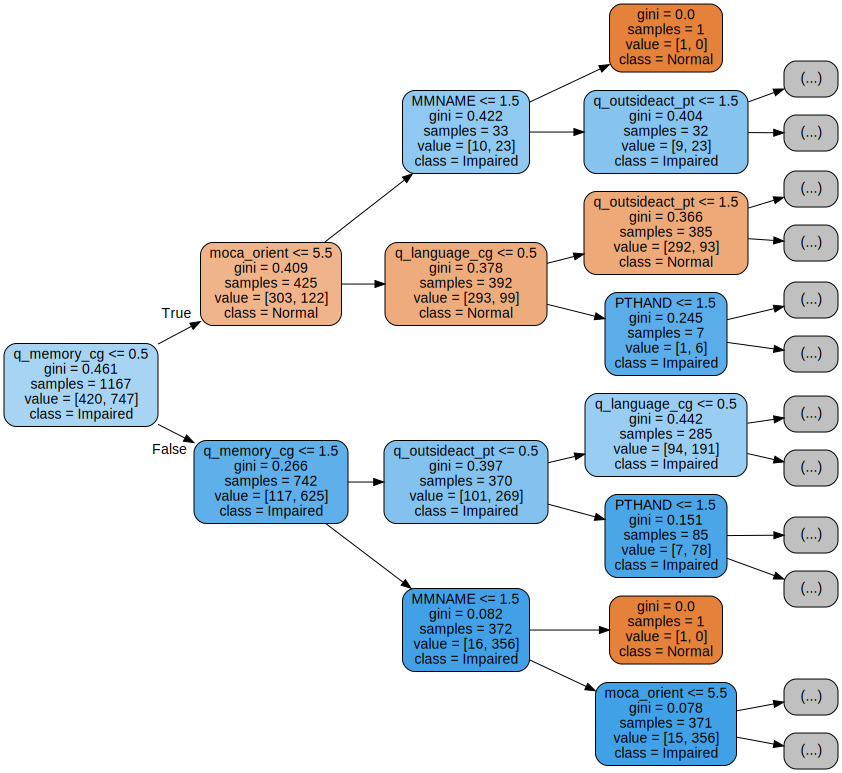

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row11_6.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 13: ['q_memory_cg', 'q_language_cg', 'MMNAME', 'q_outsideact_pt', 'moca_orient', 'faq8']

In [0]:
features = df_costsum.iloc[13,3]

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=None, 
                            min_samples_leaf=5, bootstrap=True, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8424494382022473


              precision    recall  f1-score   support

         0.0      0.743     0.904     0.816       125
         1.0      0.921     0.781     0.845       178

    accuracy                          0.832       303
   macro avg      0.832     0.842     0.830       303
weighted avg      0.847     0.832     0.833       303



[[113  12]
 [ 39 139]]


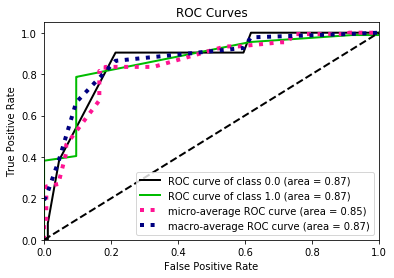

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(90,50,15), activation='relu', 
                      solver='adam', alpha=.0001, learning_rate_init=.0005, 
                      max_iter=10000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.7667865168539326


              precision    recall  f1-score   support

         0.0      0.683     0.792     0.733       125
         1.0      0.835     0.742     0.786       178

    accuracy                          0.762       303
   macro avg      0.759     0.767     0.760       303
weighted avg      0.772     0.762     0.764       303



[[ 99  26]
 [ 46 132]]


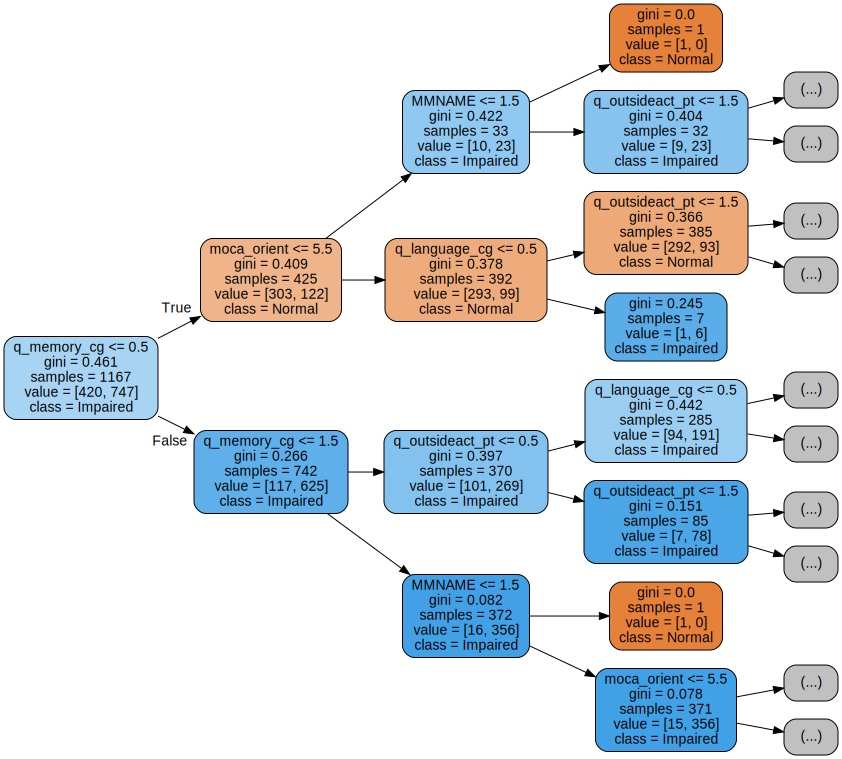

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row13_6.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 25: ['q_memory_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'q_attention_pt', 'moca_orient', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME', 'verbal_fluency', 'faq3']

In [0]:
features = df_costsum.iloc[25,3]

In [0]:
#Remove Race
features = ['q_memory_cg',
 'q_memory_pt',
 'q_language_cg',
 'moca_similarities',
 'q_attention_pt',
 'moca_orient',
 'q_outsideact_pt',
 'q_judgmt_pt',
 'MMNAME',
 'verbal_fluency',
 'faq3']

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=None, 
                            min_samples_leaf=18, bootstrap=False, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8199775280898876


              precision    recall  f1-score   support

         0.0      0.706     0.904     0.793       125
         1.0      0.916     0.736     0.816       178

    accuracy                          0.805       303
   macro avg      0.811     0.820     0.805       303
weighted avg      0.830     0.805     0.807       303



[[113  12]
 [ 47 131]]


In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,80,20), activation='relu', 
                      solver='sgd', alpha=.0001, learning_rate_init=.001, 
                      max_iter=5000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8272134831460674


              precision    recall  f1-score   support

         0.0      0.723     0.896     0.800       125
         1.0      0.912     0.758     0.828       178

    accuracy                          0.815       303
   macro avg      0.817     0.827     0.814       303
weighted avg      0.834     0.815     0.817       303



[[112  13]
 [ 43 135]]


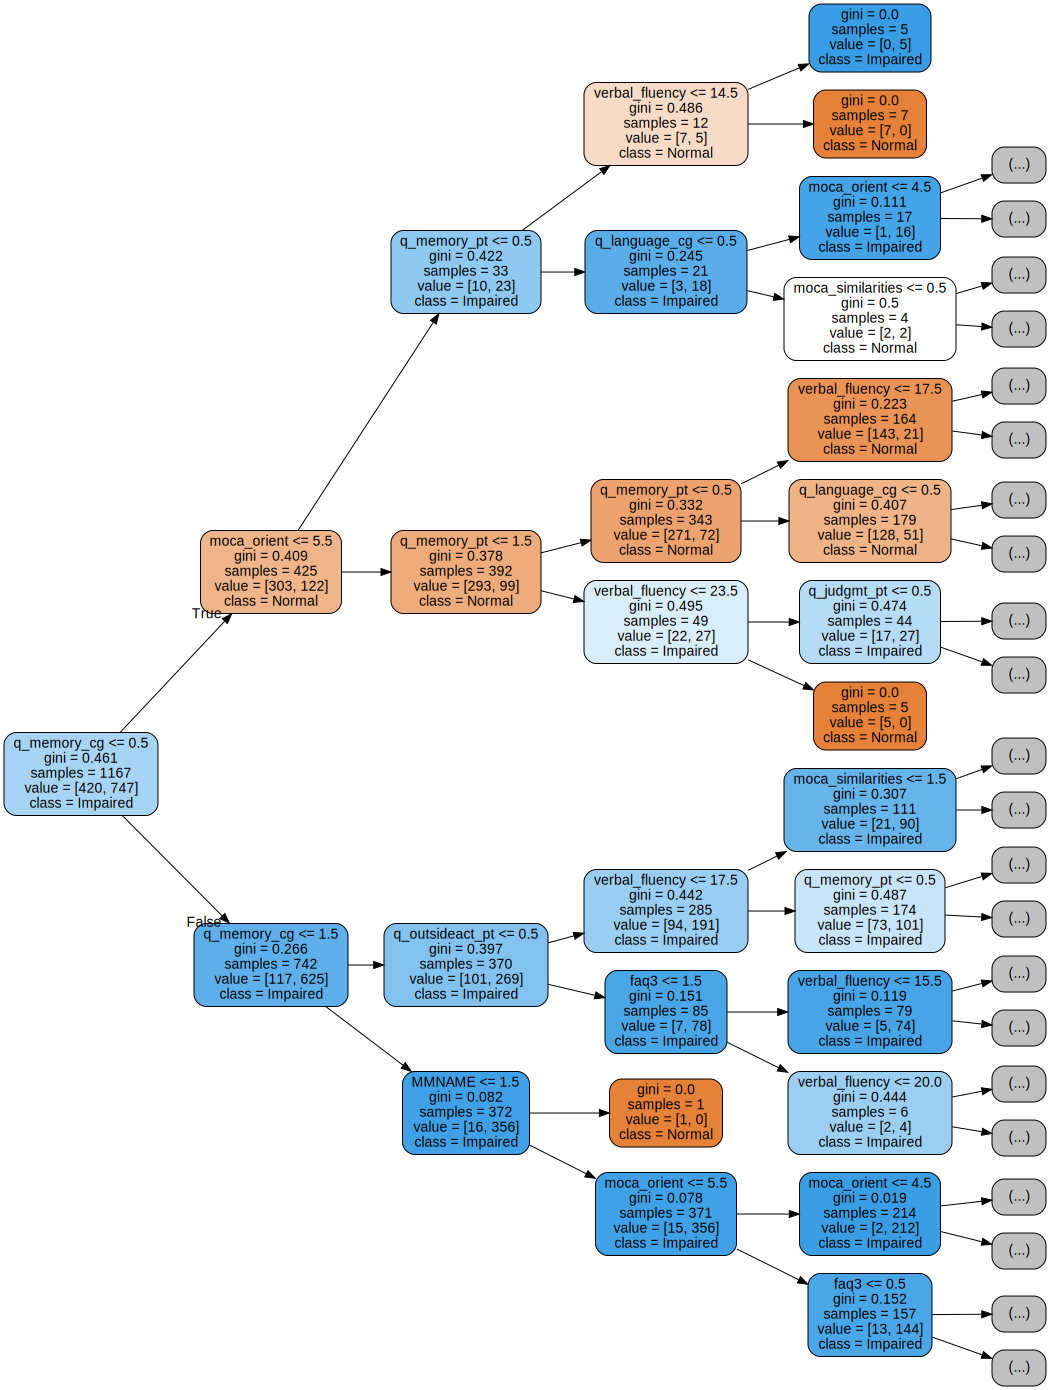

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=4)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row25_11_4.gv', directory=f'{dir}/Output/', format='pdf')
graph

## Row 26: ['q_memory_cg', 'q_memory_pt', 'q_language_cg', 'moca_similarities', 'PTHAND', 'PTRETIRED', 'PTHOME', 'q_attention_pt', 'moca_orient', 'FAMHISTAD', 'q_outsideact_pt', 'q_judgmt_pt', 'MMNAME']

In [0]:
features = df_costsum.iloc[26,3]

In [0]:
X_train = adni_X.loc[:,features]
X_test = clinic_X.loc[:,features]

clf = RandomForestClassifier(n_estimators=300, max_features=None, 
                            min_samples_leaf=30, bootstrap=False, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.8143595505617979


              precision    recall  f1-score   support

         0.0      0.698     0.904     0.787       125
         1.0      0.915     0.725     0.809       178

    accuracy                          0.799       303
   macro avg      0.806     0.814     0.798       303
weighted avg      0.825     0.799     0.800       303



[[113  12]
 [ 49 129]]


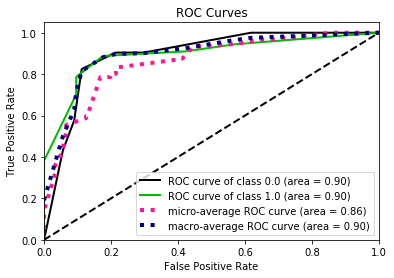

In [0]:
adni_proba = clf.predict_proba(X_test)
roc = skplt.metrics.plot_roc(clinic_y, adni_proba)
# fig = roc.get_figure()
# fig.savefig(f'{dir}/Figures/roc_eff_row0_3', dpi=300)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(105,75,60,15), activation='relu', 
                      solver='sgd', alpha=.0001, learning_rate_init=.001, 
                      max_iter=10000, random_state=0)
clf.fit(X_train, adni_y.values.ravel())
y_pred = clf.predict(X_test)
print('AUC: ', roc_auc_score(clinic_y, y_pred))
print('\n')
print(classification_report(clinic_y, y_pred, digits=3))
print('\n')
print(confusion_matrix(clinic_y, y_pred))

AUC:  0.7956404494382022


              precision    recall  f1-score   support

         0.0      0.718     0.816     0.764       125
         1.0      0.857     0.775     0.814       178

    accuracy                          0.792       303
   macro avg      0.788     0.796     0.789       303
weighted avg      0.800     0.792     0.793       303



[[102  23]
 [ 40 138]]


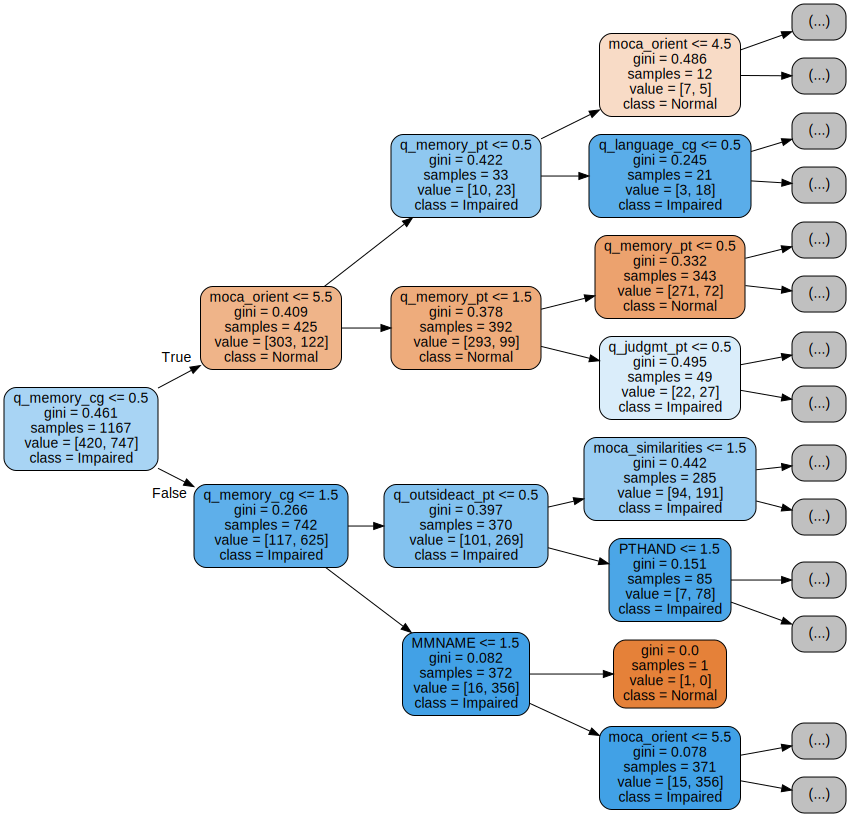

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, adni_y)

import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(clf, out_file=None,
                     feature_names=features,
                     class_names=['Normal','Impaired'],
                     filled=True, rounded=True,
                     rotate=True, max_depth=3)

graph = graphviz.Source(dot)
graph.render(filename='eff_tree_row26_13.gv', directory=f'{dir}/Output/', format='pdf')
graph

# Conclusions

The most accurate feature set using the constrained cost values happened to also be the most efficient feature set, at four features and 84.2% accuracy (AUC = 0.853)